In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
confirmed=pd.read_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/data_Confirmed.csv')
confirmed.head()

,Country/Region,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,...,20220412,20220413,20220414,20220415,20220416,20220417,20220418,20220419,20220420,20220421
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,178257,178295,178352,178373,178387,178418,178457,178513,178574,178611
1,Albania,0,0,0,0,0,0,0,0,0,...,274272,274320,274376,274429,274462,274504,274520,274535,274606,274606
2,Algeria,0,0,0,0,0,0,0,0,0,...,265730,265731,265733,265738,265739,265739,265741,265746,265746,265754
3,Andorra,0,0,0,0,0,0,0,0,0,...,40328,40709,40709,40709,40709,40709,40709,40709,41013,41013
4,Angola,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99287,99287,99287


In [92]:
death= pd.read_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/data_Deaths.csv')
death.head()

,Country/Region,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,...,20220412,20220413,20220414,20220415,20220416,20220417,20220418,20220419,20220420,20220421
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7676,7676,7676,7676,7676,7678,7679,7680,7680,7680
1,Albania,0,0,0,0,0,0,0,0,0,...,3494,3494,3495,3495,3496,3496,3496,3496,3496,3496
2,Algeria,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,Andorra,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [93]:
recovered= pd.read_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/data_Recovered.csv')
recovered.head()

,Country/Region,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,...,20220412,20220413,20220414,20220415,20220416,20220417,20220418,20220419,20220420,20220421
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# for all 3 datasets, change row as column and column as row
confirmed=confirmed.T
death=death.T
recovered=recovered.T

In [95]:
confirmed.columns

RangeIndex(start=0, stop=198, step=1)

In [96]:
# promote first row as column names
confirmed.columns=confirmed.iloc[0]
death.columns=death.iloc[0]
recovered.columns=recovered.iloc[0]

In [97]:
confirmed.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=198)

In [98]:
# reset index
confirmed=confirmed.reset_index()
death=death.reset_index()
recovered=recovered.reset_index()
confirmed.columns

Index(['index', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=199)

In [99]:
confirmed.head()

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,20200122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20200123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,20200124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,20200125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [100]:
# drop first row
confirmed=confirmed[1:]
death=death[1:]
recovered=recovered[1:]

confirmed.head()

Country/Region,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,20200122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20200123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,20200124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,20200125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
5,20200126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [101]:
confirmed.columns

Index(['index', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=199)

In [104]:
# rename 'Country/Region' column name to new name 'Date' in all 3 datasets
confirmed=confirmed.rename(columns={'index': 'Date'})
death=death.rename(columns={'index' : 'Date'})
recovered=recovered.rename(columns={'index': 'Date'})

confirmed.head()

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,20200122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20200123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,20200124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,20200125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
5,20200126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [105]:
recovered.head()

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,20200122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20200123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20200124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20200125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20200126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# change the first column values to datetime. now the data is in 20200122	form. but first 4 digits are year, next 2 are month and last 2 are day. so first put a '-' after 4th digit and then after 6th digit. then convert to datetime
confirmed['Date']=confirmed['Date'].str[:4]+'-'+confirmed['Date'].str[4:6]+'-'+confirmed['Date'].str[6:]
death['Date']=death['Date'].str[:4]+'-'+death['Date'].str[4:6]+'-'+death['Date'].str[6:]
recovered['Date']=recovered['Date'].str[:4]+'-'+recovered['Date'].str[4:6]+'-'+recovered['Date'].str[6:]

confirmed['Date']=pd.to_datetime(confirmed['Date'])
death['Date']=pd.to_datetime(death['Date'])
recovered['Date']=pd.to_datetime(recovered['Date'])

confirmed.head()

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
5,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [109]:
# from columns other than 'Date', choose Brazil, Germany, Italy, Spain, UK, China, India,Israel, Russia, and USA only
confirmed=confirmed[['Date','Brazil', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'China', 'India','Israel', 'Russia', 'US']]
death=death[['Date','Brazil', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'China', 'India','Israel', 'Russia', 'US']]
recovered=recovered[['Date','Brazil', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'China', 'India','Israel', 'Russia', 'US']]

confirmed.head()

Country/Region,Date,Brazil,Germany,Italy,Spain,United Kingdom,China,India,Israel,Russia,US
1,2020-01-22,0,0,0,0,0,548,0,0,0,1
2,2020-01-23,0,0,0,0,0,643,0,0,0,1
3,2020-01-24,0,0,0,0,0,920,0,0,0,2
4,2020-01-25,0,0,0,0,0,1406,0,0,0,2
5,2020-01-26,0,0,0,0,0,2075,0,0,0,5


In [110]:
confirmed.columns

Index(['Date', 'Brazil', 'Germany', 'Italy', 'Spain', 'United Kingdom',
       'China', 'India', 'Israel', 'Russia', 'US'],
      dtype='object', name='Country/Region')

In [111]:
confirmed.reset_index(drop=True, inplace=True)
death.reset_index(drop=True, inplace=True)
recovered.reset_index(drop=True, inplace=True)

confirmed.head()

Country/Region,Date,Brazil,Germany,Italy,Spain,United Kingdom,China,India,Israel,Russia,US
0,2020-01-22,0,0,0,0,0,548,0,0,0,1
1,2020-01-23,0,0,0,0,0,643,0,0,0,1
2,2020-01-24,0,0,0,0,0,920,0,0,0,2
3,2020-01-25,0,0,0,0,0,1406,0,0,0,2
4,2020-01-26,0,0,0,0,0,2075,0,0,0,5


In [112]:
confirmed.columns

Index(['Date', 'Brazil', 'Germany', 'Italy', 'Spain', 'United Kingdom',
       'China', 'India', 'Israel', 'Russia', 'US'],
      dtype='object', name='Country/Region')

In [119]:
# i want Country as 1 column which get from columns ,Date as 1 column, count as another column which contain values
confirmed_melted=confirmed.melt(id_vars='Date', var_name='Country', value_name='Confirmed')
death_melted=death.melt(id_vars='Date', var_name='Country', value_name='Death')
recovered_melted=recovered.melt(id_vars='Date', var_name='Country', value_name='Recovered')

confirmed_melted.head()

,Date,Country,Confirmed
0,2020-01-22,Brazil,0
1,2020-01-23,Brazil,0
2,2020-01-24,Brazil,0
3,2020-01-25,Brazil,0
4,2020-01-26,Brazil,0


In [121]:
# first column is Country, second column is Date, third column is Confirmed
confirmed_melted=confirmed_melted[['Country', 'Date', 'Confirmed']]
death_melted=death_melted[['Country', 'Date', 'Death']]
recovered_melted=recovered_melted[['Country', 'Date', 'Recovered']]

confirmed_melted.head()

,Country,Date,Confirmed
0,Brazil,2020-01-22,0
1,Brazil,2020-01-23,0
2,Brazil,2020-01-24,0
3,Brazil,2020-01-25,0
4,Brazil,2020-01-26,0


In [123]:
# 1/22/2020 - 6/27/2020 filter data
confirmed_melted=confirmed_melted[(confirmed_melted['Date']>='2020-01-22') & (confirmed_melted['Date']<='2020-06-27')]
death_melted=death_melted[(death_melted['Date']>='2020-01-22') & (death_melted['Date']<='2020-06-27')]
recovered_melted=recovered_melted[(recovered_melted['Date']>='2020-01-22') & (recovered_melted['Date']<='2020-06-27')]

confirmed_melted.shape

(1580, 3)

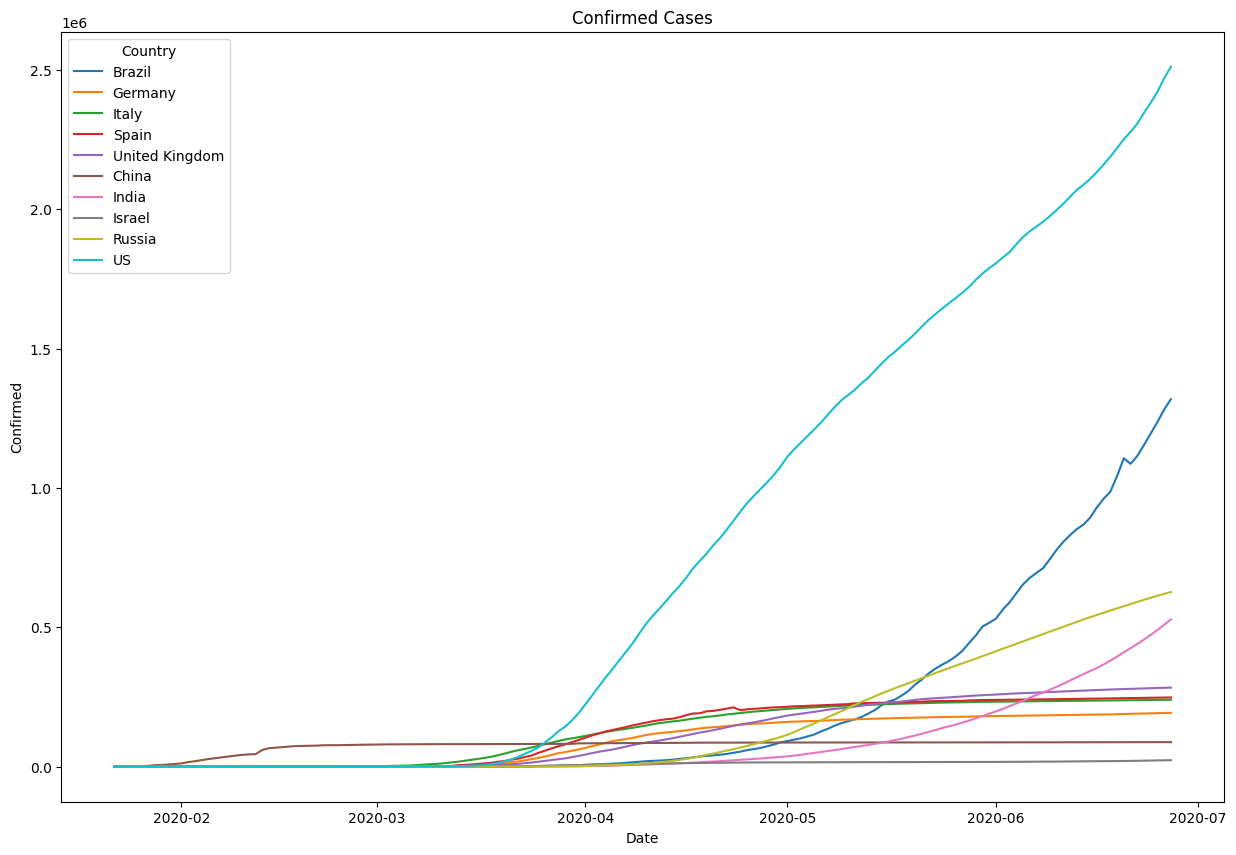

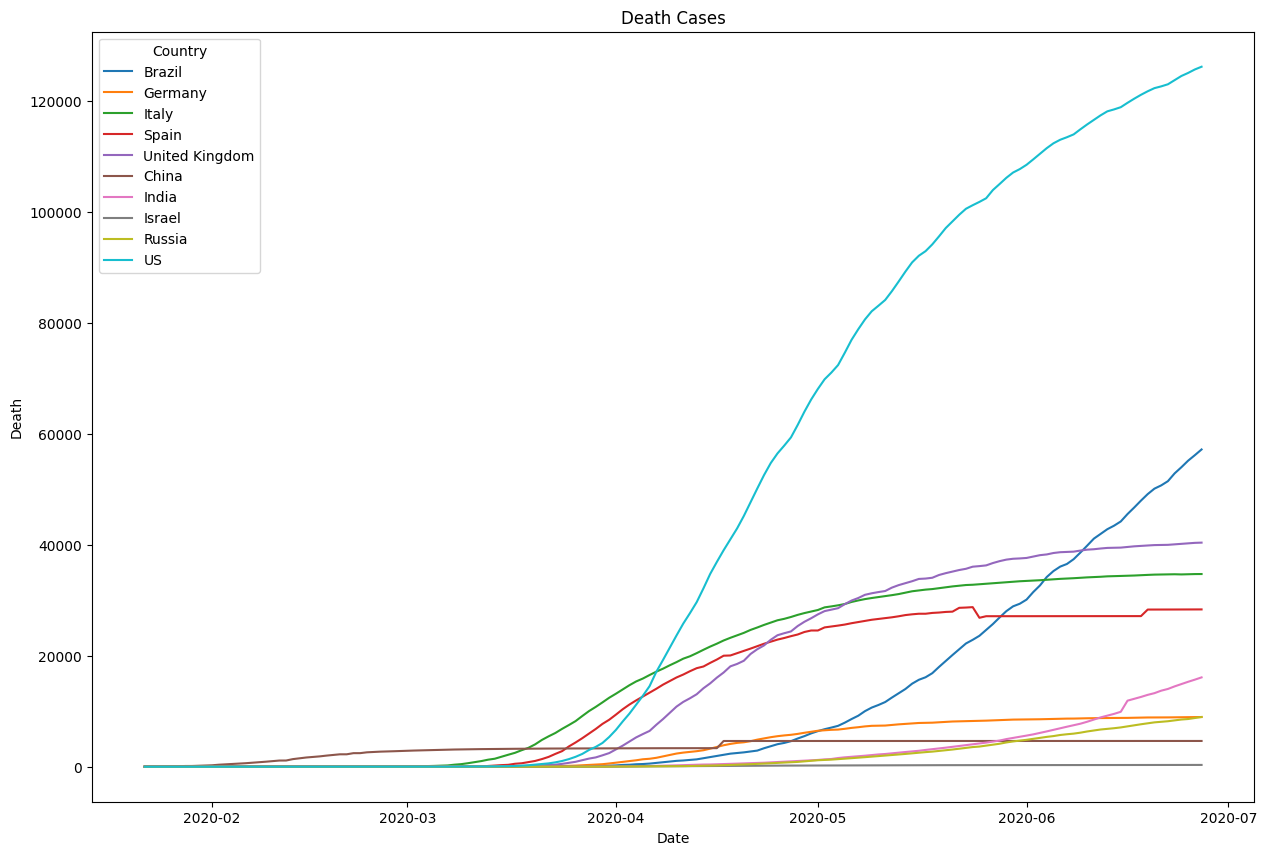

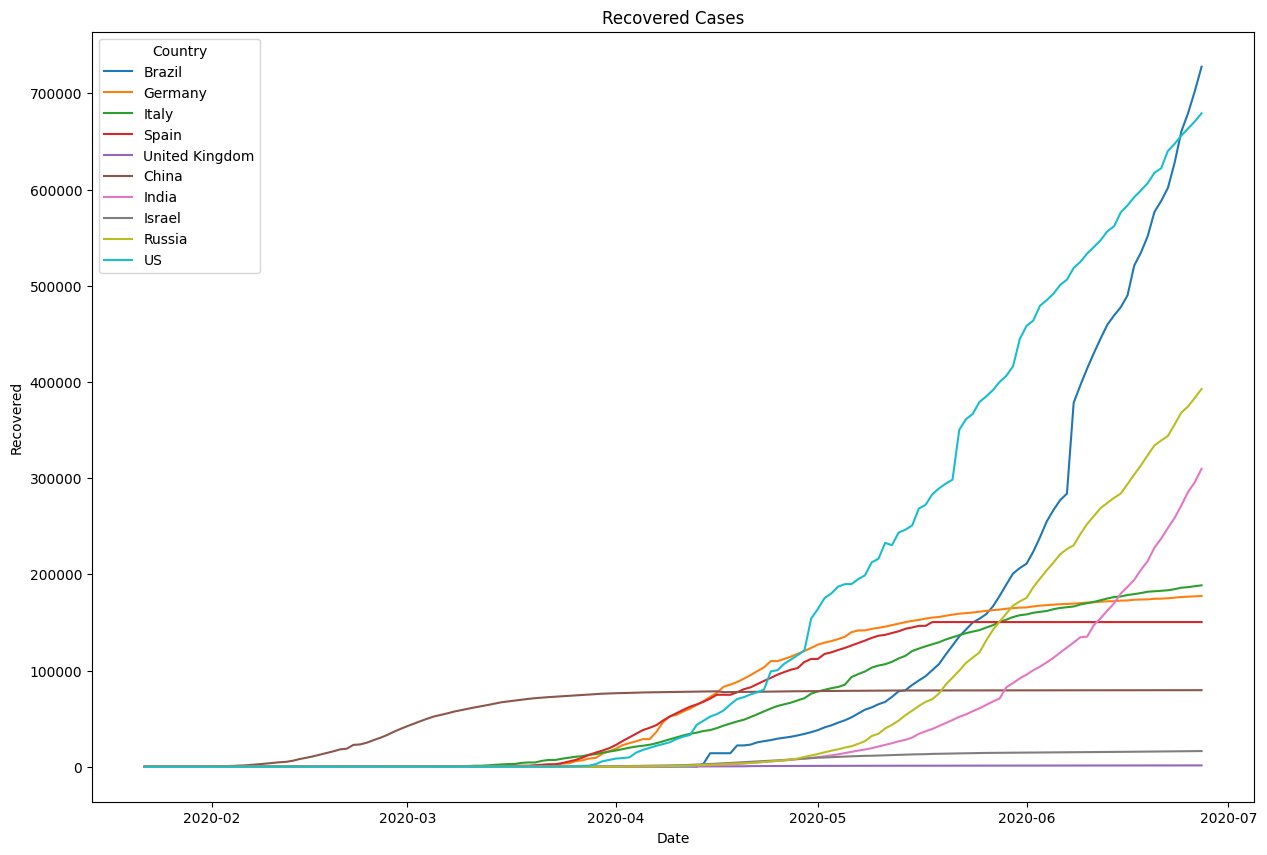

In [124]:
# draw a line plot for Confirmed cases for different countries by color
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Confirmed', hue='Country', data=confirmed_melted)
plt.title('Confirmed Cases')
plt.show()

# draw a line plot for Death cases for different countries by color
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Death', hue='Country', data=death_melted)
plt.title('Death Cases')
plt.show()

# draw a line plot for Recovered cases for different countries by color
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Recovered', hue='Country', data=recovered_melted)
plt.title('Recovered Cases')
plt.show()

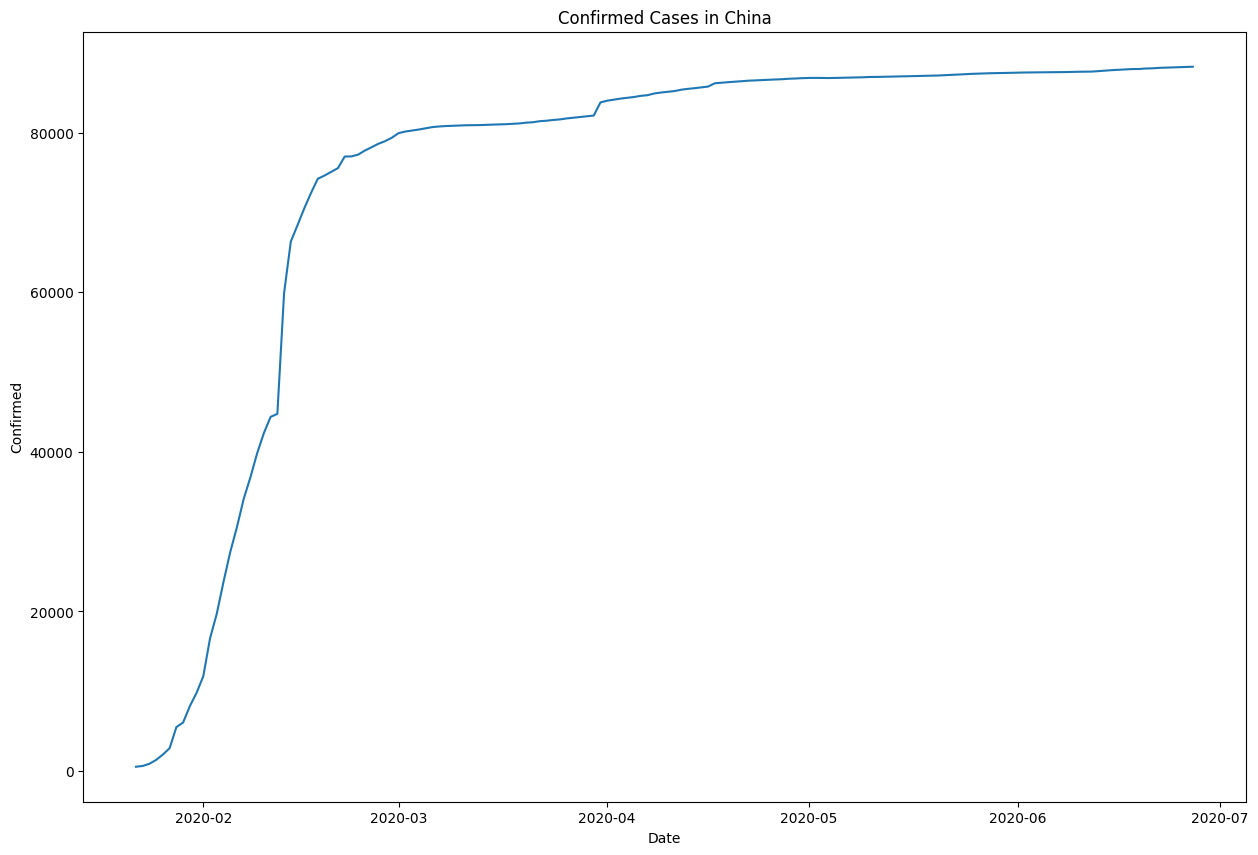

In [125]:
# for china only, draw a line plot for Confirmed cases
confirmed_melted_china=confirmed_melted[confirmed_melted['Country']=='China']
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y='Confirmed', data=confirmed_melted_china)
plt.title('Confirmed Cases in China')
plt.show()

In [126]:
# save to csv
confirmed_melted.to_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/confirmed_final.csv', index=False)
death_melted.to_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/death_final.csv', index=False)
recovered_melted.to_csv(r'../data/Base_Paper/Predictions for COVID-19 with deep learning models of LSTM, GRU, and Bi-LSTM/recovered_final.csv', index=False)